In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import *

# Turn interactive plotting off
plt.ioff()

#Turn off warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
from gradient_descent import GradientDescent
from scheduler import *

## Задание 1. Реализуйте градиентный спуск с постоянным шагом. Исследуйте сходимость при различных значениях шага
Для этого задания были реализованы классы GradientDescent, ConstLRScheduler. 

In [3]:
functions = [
    lambda x: x ** 2 + 0.5 *x,
    lambda x: x * sin(x ** 2),
    lambda x: x ** 3 - 10 * x ** 2 + x
]

derivatives = [
    lambda x: 2 * x + 0.5,
    lambda x: sin(x ** 2) + 2 * x ** 2 * cos(x ** 2),
    lambda x: 3 * x ** 2 - 20 * x + 1
]

function_names = [
    'x^2 + x/2',
    'x * sin(x^2)',
    'x^3 - 10x^2 + x'
]

from_xs = [
    -2, 
    0,
    -3
]

to_xs = [
    None,
    3,
    8
]

initial_point = 2

Processing function x^2 + x/2


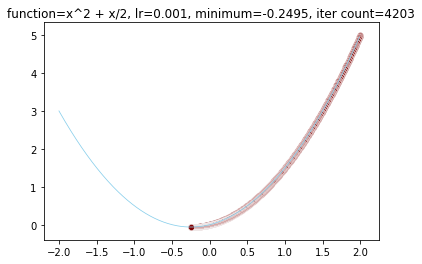

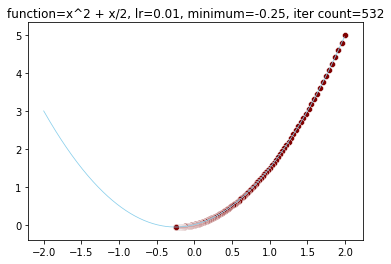

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Processing function x * sin(x^2)


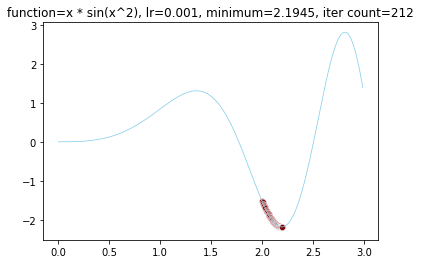

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


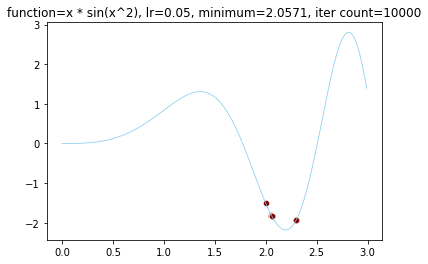

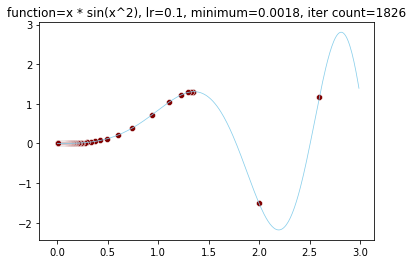

Processing function x^3 - 10x^2 + x


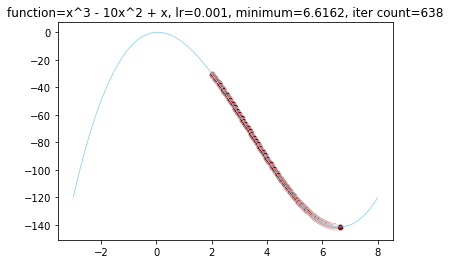

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


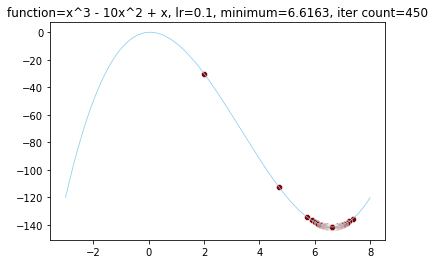

In [4]:
for i, (function, derivative, function_name, from_x, to_x) in enumerate(zip(functions, derivatives, function_names, from_xs, to_xs)):
    print(f'Processing function {function_name}')
    for lr in [0.001, 0.01, 0.05, 0.1]:
        gd = GradientDescent(function=function,
                             derivative=derivative,
                             iterations=10000,
                             initial_point=np.array([initial_point]),
                             epsilon=1e-6,
                             scheduler=ConstLRScheduler(lr))
        answer, iterations_count = gd.optimize()
        gd.plot_trace(title=f'function={function_name}, lr={lr}, minimum={round(answer[0], 4)}, iter count={iterations_count}',
                      with_function=True, 
                      animate='auto', 
                      filename=f'gifs/ani_{i}_{lr}.gif',
                      from_x=from_x,
                      to_x=to_x
                      )
    print('====================================')

## Задание 2. Подберите функцию изменения шага (learning rate scheduling), чтобы улучшить сходимость.
В качестве функции изменения шага была выбрана экспоненциальная функция.

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


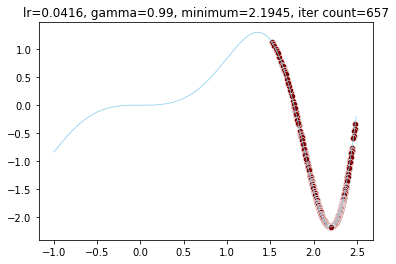

In [5]:
gammas = [0.1, 0.2, 0.5, 0.75, 0.9, 0.99]
lr = 0.08
period = 10

for gamma in gammas:
    scheduler = ExpLRScheduler(lr=lr, gamma=gamma, period=period)
    gd = GradientDescent(function=functions[1], 
                         derivative=derivatives[1], 
                         initial_point=np.array([initial_point]),
                         epsilon=1e-06,
                         iterations=100000,
                         scheduler=scheduler)
    answer, iterations_count = gd.optimize()
    gd.plot_trace(title=f'lr={round(scheduler.lr, 4)}, gamma={gamma}, minimum={round(answer[0], 4)}, iter count={iterations_count}', 
                  with_function = True, 
                  animate='auto', 
                  filename=f'gifs/gd_{gamma}.gif', 
                  plot_one_point=True,
                  from_x=-1,
                  to_x=2.5)

## Задание 3. Реализовать какой-нибудь метод одномерного поиска (дихотомия, метод Фибоначчи, метод золотого сечения) и градиентный спуск на его основе. Сравнить эффективность с точки зрения количества вычислений минимизируемой функции и ее градиентов.

In [6]:
fs = [lambda x: x ** 2, 
      lambda x: np.sin(x) / x, 
      lambda x: 0.001 * x ** 3 + 0.01 * x ** 2]
f_grads = [lambda x: x * 2, 
           lambda x: (np.cos(x) * x - np.sin(x)) / x ** 2, 
           lambda x: 0.003 * x ** 2 + 0.02 * x]
f_names = ['x^2', 'sin(x)divx', 'x^3-10x^2+x']
initial_points = [10, 0.1, 10]

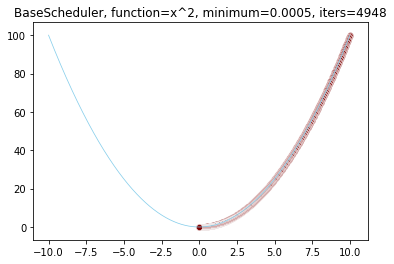

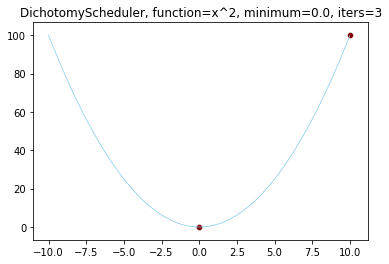

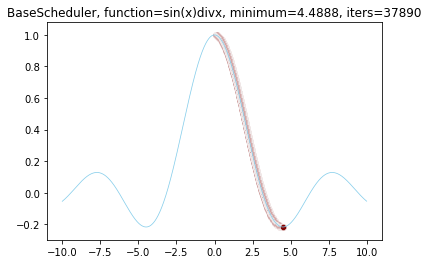

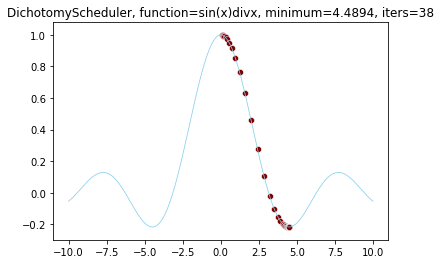

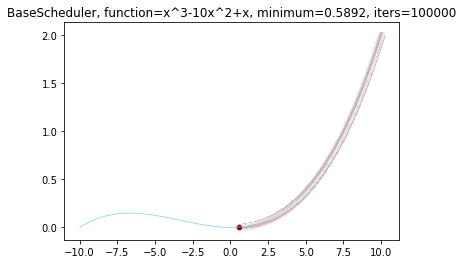

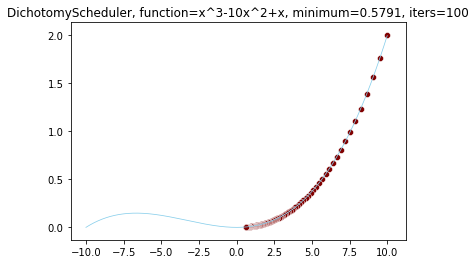

In [7]:
for f, f_grad, initial_point, f_name in zip(fs, f_grads, initial_points, f_names):
    base_gd = GradientDescent(
        function=f, 
        derivative=f_grad, 
        iterations=100000, 
        epsilon=1e-6, 
        initial_point=np.array([initial_point])
    )
    base_answer, base_iterations_count = base_gd.optimize()
    base_gd.plot_trace(
        with_function=True, 
        from_x=-10, 
        to_x=10, 
        title=f'BaseScheduler, function={f_name}, minimum={round(base_answer[0], 4)}, iters={base_iterations_count}',
    )

    scheduler = DichotomyScheduler(f, iters=10)
    dichotomy_gd = GradientDescent(
        function=f, derivative=f_grad, 
        scheduler=scheduler, 
        iterations=100, 
        initial_point=np.array([initial_point])
    )
    dichotomy_answer, dichotomy_iterations_count = dichotomy_gd.optimize()
    dichotomy_gd.plot_trace(
        with_function=True, 
        from_x=-10, 
        to_x=10, 
        title=f'DichotomyScheduler, function={f_name}, minimum={round(dichotomy_answer[0], 4)}, iters={dichotomy_iterations_count}',
    )

В базовой реализации градиентного спуска с константным learning rate количество вызовов функции градиента совпадает с количеством итераций градиентного спуска. В реализации с использованием метода дихотомии на каждом шаге кроме вычисления функции градиента еще в худшем случае O(число итераций метода дихотомии) раз вызывается сама функция. Из графиков видим, что для сходимости градиентного спуска с помощью дихотомии требуется на 3 порядка меньше итераций, а сама дихотомия запускается в данной реализации всего лишь 10 раз, так что получаем, что градиентный спуск с дихотомией работает как м инимум в 100 раз эффективнее, чем стандартный с точки зрения вычислений минимизируемой функции и ее градиентов.

## Задание 4. Сделать одномерный поиск с учетом условий Вольфе и исследовать эффективность.
1. $f(x_k + \alpha p_k) \le f(x_k) + c_1 \alpha \nabla f(x_k) p_k$
2. $\nabla f(x_k + \alpha p_k) p_k \ge c_2 \nabla f(x_k) p_k$
3. $0 \le c_1 \le c_2 \le 1$

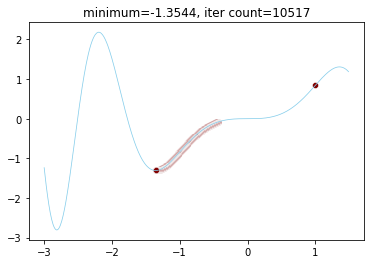

In [8]:
initial_point = 1
gd = GradientDescent(function=functions[1], 
                     derivative=derivatives[1], 
                     initial_point=np.array([initial_point]),
                     epsilon=1e-06,
                     iterations=100000,
                     wolfe=True)
answer, iterations_count = gd.optimize()
gd.plot_trace(title=f'minimum={round(answer[0], 4)}, iter count={iterations_count}', 
                with_function = True, 
                animate='auto', 
                filename=f'gifs/wolfe.gif', 
                plot_one_point=True,
                from_x=-3, to_x=1.5)

## Задание 5. Проанализируйте траекторию градиентного спуска для нескольких квадратичных функций: 
придумайте две-три квадратичные двумерные функции, на которых работа метода будет отличаться, нарисуйте графики с линиями уровня  функций и траекториями методов. Попробуйте ответить на следующий вопрос: Как отличается поведение метода в зависимости от числа обусловленности функции, выбора начальной точки и стратегии выбора шага?


In [3]:
def f1_3d(xs):
    x, y = xs[0], xs[1]
    return (x ** 2 + y - 2) ** 2 + (-y ** 2 + 2 * x) ** 2

def f1_3d_der(xs):
    x, y = xs[0], xs[1]
    return np.array([4 * (x** 3+ x*y - y**2), 2 * (x**2 - 4*x*y + 2 * y ** 3 + y -2)])

def f2_3d(xs):
    x, y = xs[0], xs[1]
    return x**2 * y**2

def f2_3d_der(xs):
    x, y = xs[0], xs[1]
    return np.array([2*x*y**2, 2*x**2*y])

functions_3d = [
    f1_3d,
    f2_3d
]

derivatives_3d = [
    f1_3d_der,
    f2_3d_der
]

function_names_3d = [
    '(x^2 + y - 2)^2 + (2x - y^2)^2',
    '(xy)^2'
    ]

initial_point = np.array([4, 4])

Processing function (x^2 + y - 2)^2 + (2x - y^2)^2


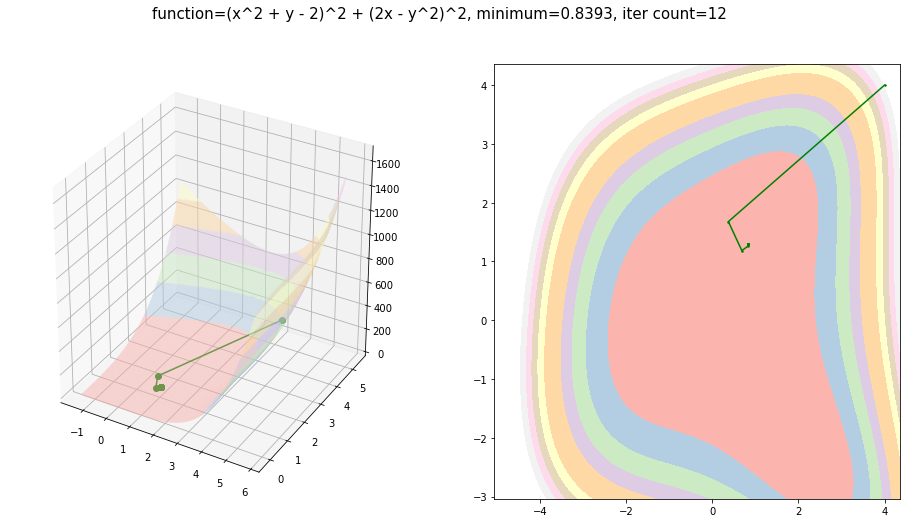

Processing function (xy)^2


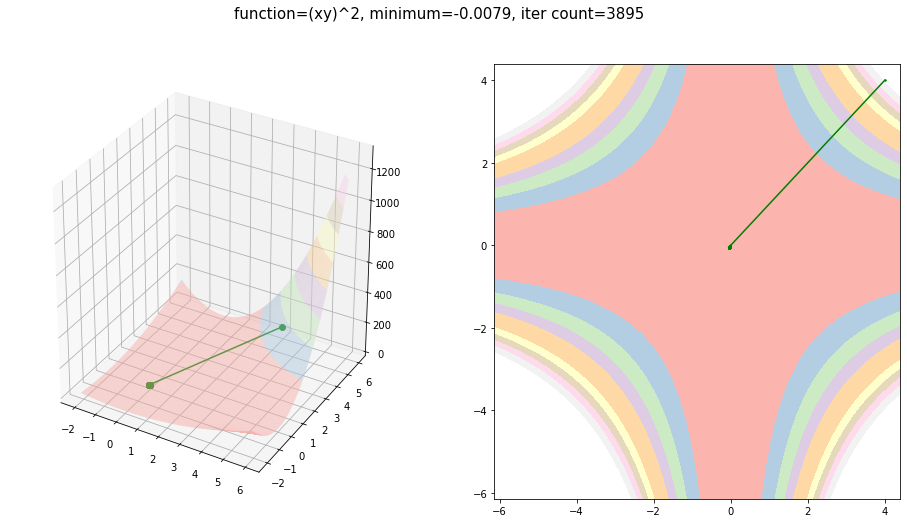

In [4]:
for i, (function, derivative, function_name) in enumerate(zip(functions_3d, derivatives_3d, function_names_3d)):
    print(f'Processing function {function_name}')
    gd = GradientDescent(function=function,
                         derivative=derivative,
                         iterations=10000,
                         initial_point=initial_point,
                         epsilon=1e-6,
                         scheduler=DichotomyScheduler(function, delta=1e-3))
    answer, iterations_count = gd.optimize()
#     try:
    gd.plot_trace(title=f'function={function_name}, minimum={round(answer[0], 4)}, iter count={iterations_count}')
    print('====================================')

## Задание 6. Исследуйте, как зависит число итераций, необходимое градиентному спуску для сходимости, от следующих двух параметров:
(а) числа обусловленности $k \leq 1$ оптимизируемой функции

(b) размерности пространства $n$ оптимизируемых переменных.

Для этого для заданных параметров $n$ и $k$ сгенерируйте случайным образом квадратичную задачу размера $n$ с числом обусловленности $k$ и запустите на ней градиентный спуск с некоторой фиксированной требуемой точностью. Замерьте число итераций $T(n, k)$, которое потребовалось сделать методу до сходимости (успешному выходу по критерию остановки).

In [2]:
def generate_Q(n, k):
    A = np.random.sample((n, n))
    U, S, _ = np.linalg.svd(A)
    lambda_min = np.min(S)
    lambda_max = np.max(S)
    S = (S - lambda_min) / (lambda_max - lambda_min) * (np.sqrt(k) - 1) + 1
    S = np.diag(S)
    
    return U @ S @ S.T @ U.T

def generate_f(Q, b):
    return lambda x: x.dot(Q).dot(x) - b.dot(x)

def generate_grad(Q, b):
    return lambda x: (Q + Q.T).dot(x) - b

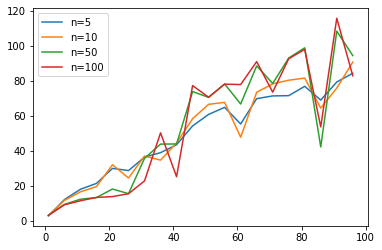

In [5]:
plot_range = range(1, 100, 5)
for n in [5, 10, 50, 100]:
    iters_value = []
    for k in plot_range:
        iters_try = []
        for _ in range(250):
            Q = generate_Q(n, k)
            b = np.random.randn(n)
            f = generate_f(Q, b)
            f_grad = generate_grad(Q, b)
            
            gd = GradientDescent(
                scheduler=DichotomyScheduler(f, delta=1e-3), 
                function=f, 
                derivative=f_grad, 
                epsilon=0.001, 
                iterations=500, 
                initial_point=np.random.rand(n))
            _, iters = gd.optimize()
            iters_try.append(iters)
        iters_value.append(np.mean(np.array(iters_try)))
    plt.plot(plot_range, iters_value, label=f'n={n}')
plt.xlabel = 'k'
plt.ylabel = 'iters'
plt.legend()
plt.show()

Получаем, что количество итераций до сходимости градиентного спуска линейно зависит от числа обусловленности вне зависимости от размер матрица квадратичной формы.